# 05_딥 러닝을 이용한 MNIST - MNIST 데이터 - 1

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 60,000장
                    # 10,000장
x_train, x_test = x_train / 255.0, x_test / 255.0
                        # 픽셀 값이 255가 최대이기 때문에.
# 0 ~ 1 사이의 값으로 조정 (일종의 min-max scaler)

In [10]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# `one-hot encoding` 
> ### - `loss` 에 `sparse_categorical_crossentropy` 를 사용하면 one-hot encoding 을 fit, transform 할 필요 없이 `바로 적용 가능`.

> ## 이번에 만들 모델
> ![](./lecture_image/05-01.png)

In [12]:
# 모델 만들기
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
                                # 은닉층이 있기 때문에 relu
    tf.keras.layers.Dense(10, activation = 'softmax')   
                                # catorical data를 분류하기 위해 softmax
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
                                        # sparse_categorical_crossentropy : ohe 로 만들어준다.

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-31 17:59:36.622538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 17:59:36.625760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### `relu` 의미
![](./lecture_image/05-02.png)

### `softmax` 의 사용
![](./lecture_image/05-03.png)
> - 출력단의 모든 합을 1로 만들어 준다. 
> - 그 후 가장 큰 값을 가진 것을 답으로 출력한다.

### `optimizer` 사용
![](./lecture_image/05-04.png)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit 하기
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
                # X : input_data
                        # Y : target_data
                                    # validation_data : Data on which to evaluate the loss and any model metrics at the end of each epoch.
                                                                                # batch_size : Integer or None. Number of samples per gradient update. 
                                                                                # If unspecified, batch_size will default to 32. 
                                                                                # Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.
                                                                                # Sequence instances (since they generate batches).
                                                                                                # verbose : 'auto', 0, 1, or 2. Verbosity mode. 
                                                                                                # 0 = silent, 1 = progress bar, 2 = one line per epoch.
print('Fit time :', time.time() - start_time)

2022-05-31 18:08:20.357448: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-05-31 18:08:20.620802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


599/600 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9345

2022-05-31 18:08:26.201913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 6s 8ms/step - loss: 0.2244 - accuracy: 0.9345 - val_loss: 0.1142 - val_accuracy: 0.9639
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0855 - accuracy: 0.9744 - val_loss: 0.0905 - val_accuracy: 0.9719
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0756 - val_accuracy: 0.9754
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0649 - val_accuracy: 0.9814
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0709 - val_accuracy: 0.9786
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0714 - val_accuracy: 0.9802
Epoch 8/10
600/60

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

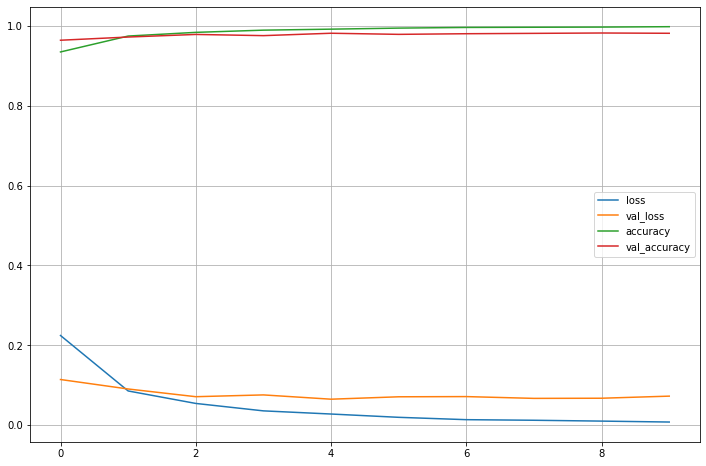

In [16]:
# acc 와 loss 그리기
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [22]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

## 머신러닝에서 93% 쯤 나왔던 결과대비 5% 쯤 향상 되었다.

2022-05-31 19:25:01.786767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0726 - accuracy: 0.9813
Test loss : 0.07255430519580841
Test accuracy : 0.9813000559806824


In [23]:
import numpy as np

predicted_result = model.predict(x_test)

2022-05-31 19:27:00.503625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[8.0000026e-12, 3.5964540e-11, 2.6643510e-09, ..., 9.9999976e-01,
        1.6640617e-09, 9.0538527e-10],
       [1.9369718e-13, 2.7872571e-09, 1.0000000e+00, ..., 1.6085935e-18,
        1.2200677e-10, 1.4094624e-18],
       [5.5274663e-10, 9.9998164e-01, 5.0373899e-07, ..., 6.5715376e-06,
        5.3580416e-06, 1.3159803e-09],
       ...,
       [3.8542258e-21, 3.7888591e-17, 2.0380946e-19, ..., 8.3975688e-11,
        1.2633717e-13, 9.9556682e-12],
       [4.2492667e-13, 1.8114247e-14, 3.8872307e-15, ..., 4.7665873e-12,
        2.2735098e-07, 5.1735872e-17],
       [1.9357787e-13, 3.0186939e-15, 3.7763959e-11, ..., 5.0228152e-18,
        7.6616917e-15, 5.1539685e-17]], dtype=float32)

In [24]:
predicted_result[0] 

array([8.0000026e-12, 3.5964540e-11, 2.6643510e-09, 2.1145446e-07,
       1.6629911e-14, 9.5142878e-12, 3.3596495e-16, 9.9999976e-01,
       1.6640617e-09, 9.0538527e-10], dtype=float32)